In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/musicfeatures/data.csv
/kaggle/input/musicfeatures/data_2genre.csv


Understand the Problem
Define the task: Is it regression (predicting continuous values) or classification (predicting discrete labels)?
**My model is a classification**

In [2]:
music1 = pd.read_csv('/kaggle/input/musicfeatures/data.csv')
music2 = pd.read_csv('/kaggle/input/musicfeatures/data_2genre.csv')


music2['label'] = music2['label'].replace(to_replace={1: 'pop', 2: 'classical'})
features_data = pd.concat([music1,music2],ignore_index=True)

features_data.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

Combining the 2 datasets into 1 as one of the datasets has extra datapoints for pop and classical

In [3]:
features_data.shape

(1200, 30)

In [4]:
features_data.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [5]:
y = features_data.label

In [6]:
features_data.drop('filename', axis=1, inplace=True)

dropping the file name as the name of a song shouldn't be important to use to classify a music genre

In [7]:
## Shape of training data (num_rows, num_columns)
print(features_data.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (features_data.isnull().sum())
print(missing_val_count_by_column)
print(100 * missing_val_count_by_column/features_data.shape[0])

(1200, 29)
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64
tempo                 0.0
beats                 0.0
chroma_stft           0.0
rmse                  0.0
spectral_centroid     0.0
spectral_bandwidth    0.0
rolloff               0.0
zero_crossing_rate    0.0
mfcc1                 0.0
mfcc2                 0.0
mfcc3               

Checking for any missing values which in this case there are none meaning we won't need to impute or drop any values

In [8]:
# Get list of categorical variables
s = (features_data.dtypes == 'object')
object_cols = list(s[s].index)

for col in object_cols:
    features_data[col] = features_data[col].astype(str)
    
print("Categorical variables:")
print(object_cols)

Categorical variables:
['label']


Figuring out what the categorical variables are which is just label

In [9]:
print(features_data.label.unique())

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [10]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
label_features_data = features_data.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_features_data[object_cols] = ordinal_encoder.fit_transform(features_data[object_cols])

Deciding to use original encoder as one hot encoder would cause overfitting as the feature space would increase by a lot 

In [11]:
print("Category to Label Mapping:")
print(ordinal_encoder.categories_)

Category to Label Mapping:
[array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)]


In [12]:
label_features_data.columns

Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label'],
      dtype='object')

In [13]:
missing_val_count_by_column = (features_data.isnull().sum())
print(missing_val_count_by_column)

tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64


double checking that there are no missing values

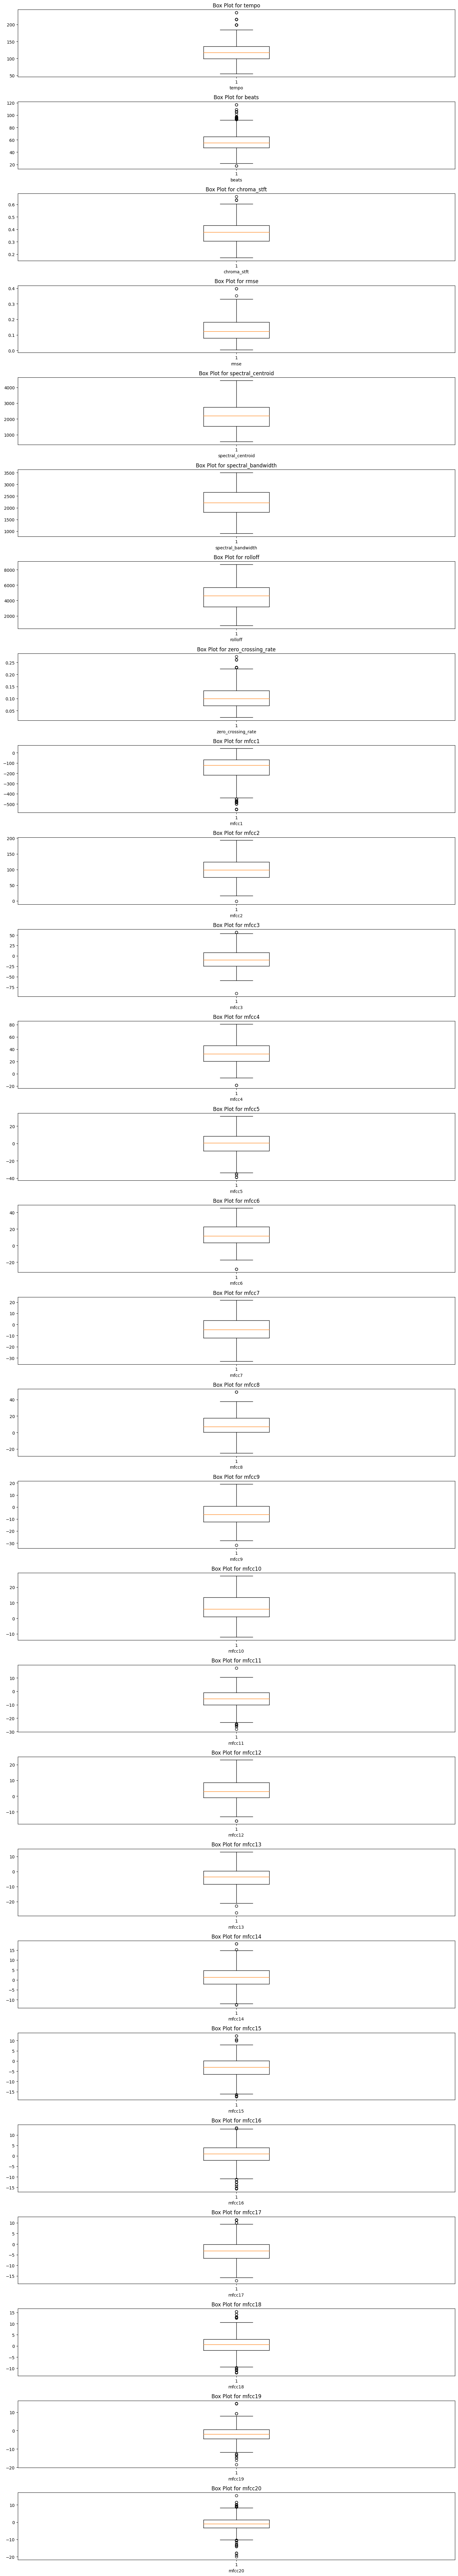

In [14]:

#Loop to plot all features
import pandas as pd
import matplotlib.pyplot as plt


features = [x for x in features_data.columns if x != 'label']

plt.figure(figsize=(15, len(features) * 3))

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    plt.boxplot(features_data[feature].dropna())
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [15]:
features = ['tempo','chroma_stft','spectral_bandwidth','rolloff','zero_crossing_rate','rmse','mfcc4','mfcc13', 'beats','mfcc3']
X = label_features_data[features]

y = label_features_data.label

Decided on these features as the others either have too many outliers or are completly random so they decrease my accuracy scores

In [16]:
from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Splitting the training data into 80% being the training and 20% being the testing

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50,  min_samples_split=2, min_samples_leaf=1,max_features='sqrt',random_state=0)
rf_model.fit(X_train, y_train)
rf_train_predictions = rf_model.predict(X_train)
rf_valid_predictions = rf_model.predict(X_valid)

Here is a list of my progress on how my model improved over time and its accuracy scores. The first number will be the value, the 2nd training accuracy and 3nd will be test accuracy.

N_estimators:

100: 99.9%, 72.5%,

500: 99.9%, 71.67%,

200: 99.9%, 70.83%,

50: 99.9%, 73.33%,

40: 99.9%, 72.08%,

49:99.9%, 72.5%

max_depth:

none: 99.9%, 73.33%,

17: 99.9%, 73.33%,

10: 99.06%, 70.83%,

3:54.9%, 54.17%,

6: 81.04%, 69.17%

min_samples_split:

2: 99.9%, 73.33%,

3: 99.9%, 71.25%,

5:99.9%, 72.08%,

10: 96.15%, 70.42%

min_samples_leaf:

1:99.9%, 73.33%,

2:98.54%, 69.58%,

5: 88.75%, 67.92%

After testing decided on those paramaters and RandomForestClassifier as its the model that gives the highest test accuracy

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_true = y_train
y_pred = rf_train_predictions
y_predValid = rf_valid_predictions

accuracy = accuracy_score(y_true, y_pred)
accuracy1 = accuracy_score(y_valid, y_predValid)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print evaluation metrics
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (accuracy1 * 100.0))
conf_matrix_df = pd.DataFrame(conf_matrix, 
                     index=['Blues', 'Classical', 'Country', 'Disco', 'Hiphop', 'Jazz', 'Metal','Pop', 'Reggae', 'Rock'], 
                     columns=['Blues', 'Classical', 'Country', 'Disco', 'Hiphop', 'Jazz','Metal', 'Pop', 'Reggae', 'Rock'])
print(conf_matrix_df)

Train Accuracy: 99.90%
Test Accuracy: 73.33%
           Blues  Classical  Country  Disco  Hiphop  Jazz  Metal  Pop  Reggae  \
Blues         79          0        0      0       0     0      0    0       0   
Classical      0        163        0      0       0     0      0    0       0   
Country        0          0       85      0       0     0      0    0       0   
Disco          0          0        0     81       0     0      0    0       0   
Hiphop         0          0        0      0      82     0      0    0       0   
Jazz           0          0        0      0       0    76      0    0       0   
Metal          0          0        0      0       0     0     76    0       0   
Pop            0          0        0      0       0     0      0  159       0   
Reggae         0          0        0      0       0     0      0    0      79   
Rock           0          0        0      0       0     0      1    0       0   

           Rock  
Blues         0  
Classical     0  
Country  

Making a confusion matrix to check what my model detected wrong and since my train accuracy is so much higher than my test accuracy that means my model is overfit. I attempted to fix this by lowering the complexity of my model but it just decreased my train accuracy by 30% while only increasing test by 2% so I decided it was not worth it. The best solution I could find was hypertuning the parameters and it increased both my train accuracy and test accuracy. My test accuracy before was in the low 60% but now its 73.33%

In [19]:
print(f"Total number of rows in training data: {len(y_true)}")
print(f"No. blues : {len(y_true[y_true==0])}")
print(f"No. classical : {len(y_true[y_true==1])}")
print(f"No. country : {len(y_true[y_true==2])}")
print(f"No. disco: {len(y_true[y_true==3])}")
print(f"No. hiphop: {len(y_true[y_true==4])}")
print(f"No. jazz: {len(y_true[y_true==5])}")
print(f"No. metal: {len(y_true[y_true==6])}")
print(f"No. pop: {len(y_true[y_true==7])}")
print(f"No. reggae: {len(y_true[y_true==8])}")
print(f"No. rock: {len(y_true[y_true==9])}")

Total number of rows in training data: 960
No. blues : 79
No. classical : 163
No. country : 85
No. disco: 81
No. hiphop: 82
No. jazz: 76
No. metal: 76
No. pop: 159
No. reggae: 79
No. rock: 80


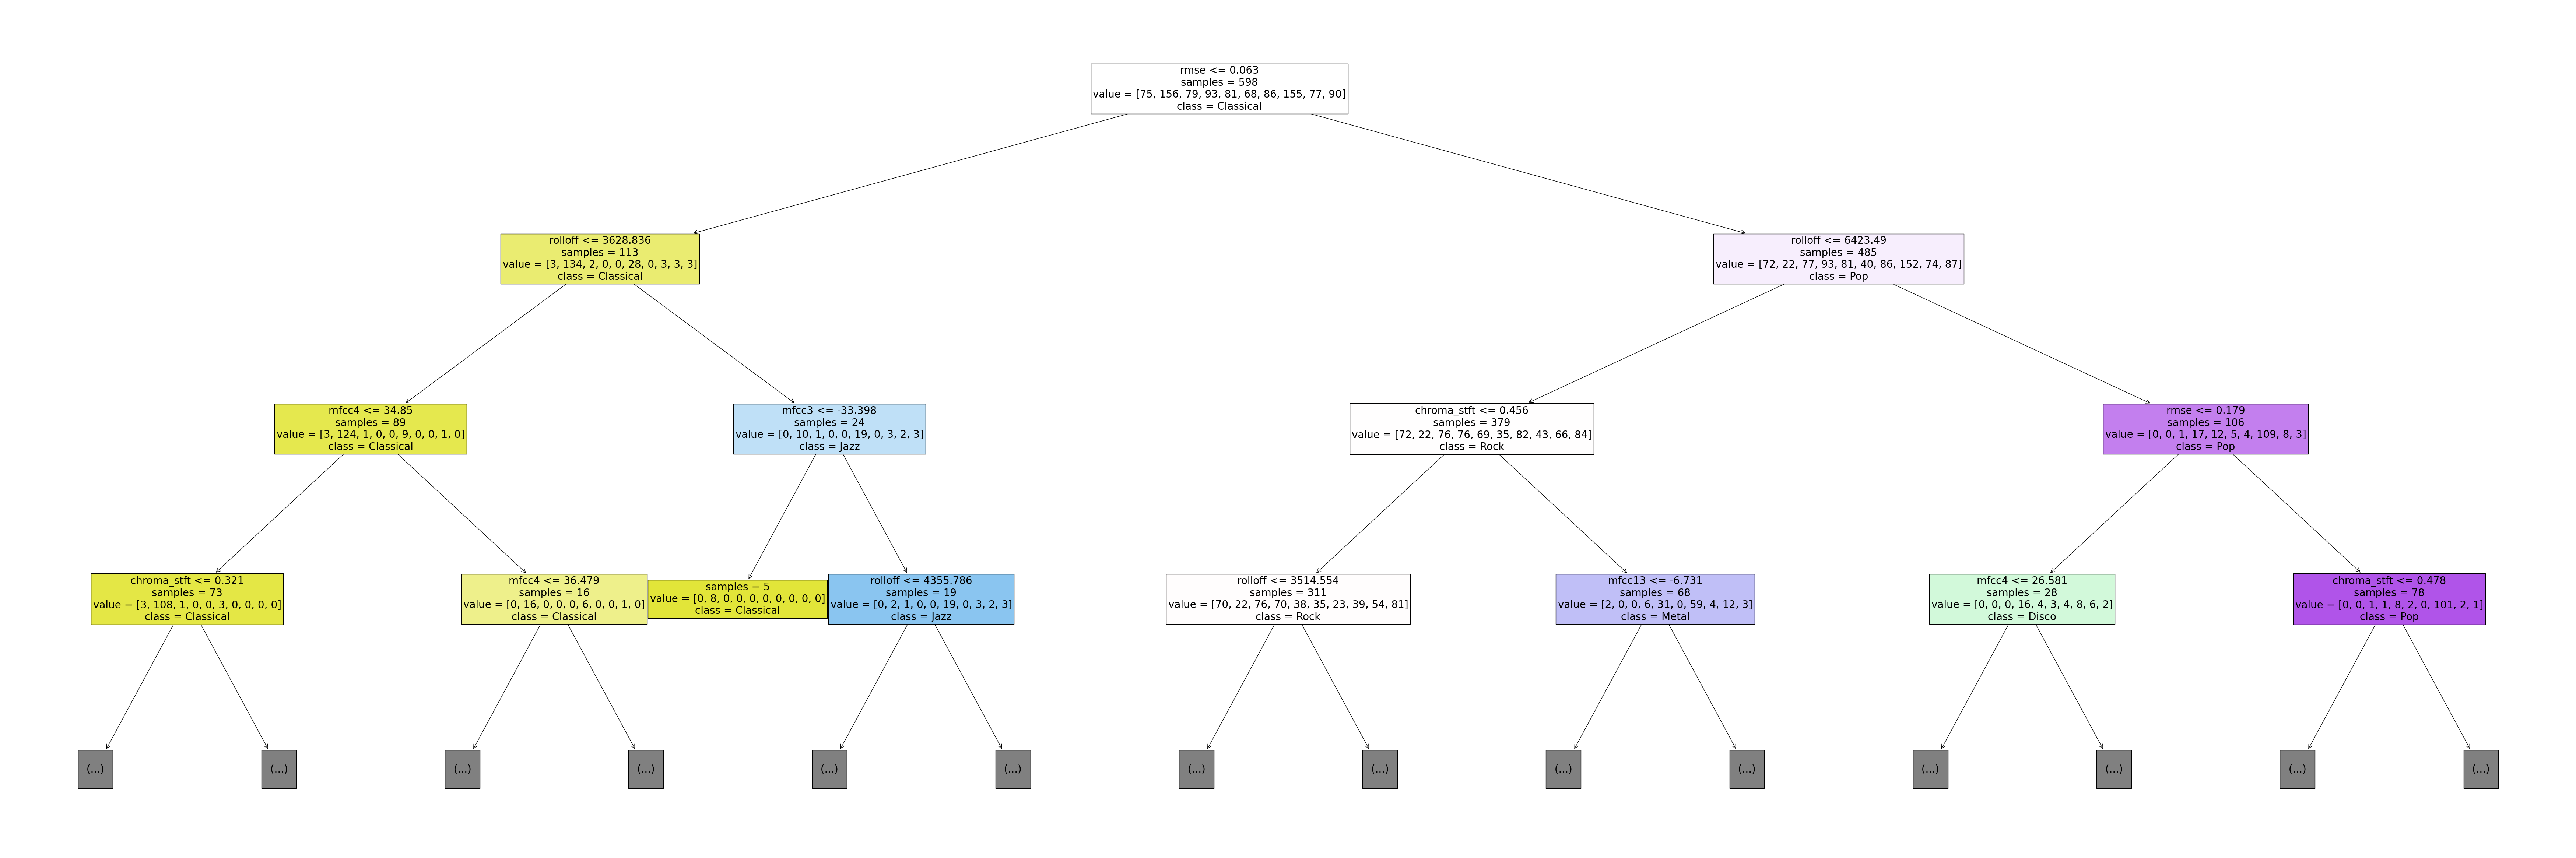

In [20]:
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
plt.figure(figsize=(90, 30))
tree.plot_tree(rf_model.estimators_[25], feature_names=X_train.columns, impurity = False, class_names=['Blues', 'Classical', 'Country', 'Disco', 'Hiphop', 'Jazz', 'Metal','Pop', 'Reggae', 'Rock'], filled=True, max_depth=3,fontsize=20,)
plt.show()

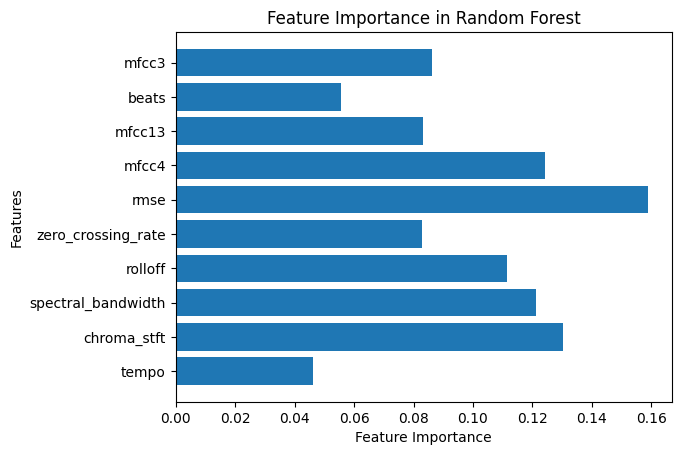

In [21]:
feature_importances = rf_model.feature_importances_
features = np.array(X_train.columns)

plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

Creating a feature importance to see what the most important features are and so that I could go back and remove not important features

In [22]:
from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [23]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=66,learning_rate=0.05, subsample=0.8,colsample_bytree=1)
model.fit(X_train, y_train, early_stopping_rounds=3, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

boost_train_predictions = model.predict(X_train)
boost_valid_predictions = model.predict(X_valid)

y_true = y_train
y_pred = boost_train_predictions
y_predValid = boost_valid_predictions

accuracy = accuracy_score(y_true, y_pred)
accuracy1 = accuracy_score(y_valid, y_predValid)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print evaluation metrics
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
conf_matrix_df = pd.DataFrame(conf_matrix, 
                     index=['Blues', 'Classical', 'Country', 'Disco', 'Hiphop', 'Jazz', 'Metal','Pop', 'Reggae', 'Rock'], 
                     columns=['Blues', 'Classical', 'Country', 'Disco', 'Hiphop', 'Jazz','Metal', 'Pop', 'Reggae', 'Rock'])
print(conf_matrix_df)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Train Accuracy: 95.52%
Accuracy: 68.75%
           Blues  Classical  Country  Disco  Hiphop  Jazz  Metal  Pop  Reggae  \
Blues         71          0        3      0       0     1      2    0       0   
Classical      0        163        0      0       0     0      0    0       0   
Country        1          0       83      1       0     0      0    0       0   
Disco          0          0        0     76       1     0      1    3       0   
Hiphop         0          0        0      1      79     0      1    1       0   
Jazz           0          0        0      1       0    74      0    1       0   
Metal          1          0        0      2       0     0     73    0       0   
Pop            0          0        0      0       1     0      0  158       0   
Reggae         0          0        1      2       0     0      0    1      75   
Rock           1          0        3      7       1     0      1    0       2   

           Rock  
Blues         2  
Classical     0  
Country       

My XGBoost model is overfit as well and performs less well than my Random Forest model

In [24]:
print(f"Total number of rows in training data: {len(y_true)}")
print(f"No. blues : {len(y_true[y_true==0])}")
print(f"No. classical : {len(y_true[y_true==1])}")
print(f"No. country : {len(y_true[y_true==2])}")
print(f"No. disco: {len(y_true[y_true==3])}")
print(f"No. hiphop: {len(y_true[y_true==4])}")
print(f"No. jazz: {len(y_true[y_true==5])}")
print(f"No. metal: {len(y_true[y_true==6])}")
print(f"No. pop: {len(y_true[y_true==7])}")
print(f"No. reggae: {len(y_true[y_true==8])}")
print(f"No. rock: {len(y_true[y_true==9])}")

Total number of rows in training data: 960
No. blues : 79
No. classical : 163
No. country : 85
No. disco: 81
No. hiphop: 82
No. jazz: 76
No. metal: 76
No. pop: 159
No. reggae: 79
No. rock: 80
